<h3> Funkcje aktywacji

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10,10,100) #100 liczb z zakresu -10 : 10

In [3]:
y1 = 1/(1+np.exp(-x))
y2 = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
y3 = np.array([max(elem,0) for elem in x])
y4 = np.exp(-x**2/2)

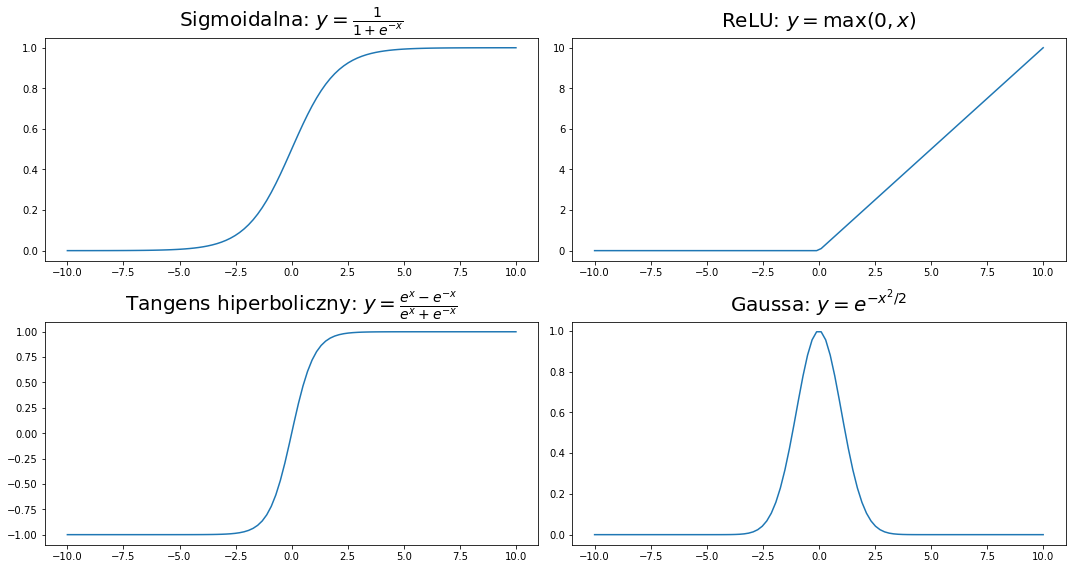

In [4]:
fig, axs = plt.subplots(2, 2,figsize=(15,8))
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Sigmoidalna: ' + r'$y=\frac{1}{1+e^{-x}}$',fontsize = 20, y=1.02)
axs[1, 0].plot(x, y2)
axs[1, 0].set_title('Tangens hiperboliczny: ' + r'$y=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$',fontsize = 20, y=1.02)
axs[0, 1].plot(x, y3)
axs[0, 1].set_title('ReLU: ' + r'$y=\max(0,x)$',fontsize = 20, y=1.02)
axs[1, 1].plot(x, y4)
axs[1, 1].set_title('Gaussa: ' + r'$y=e^{-x^2/2}$',fontsize = 20, y=1.02)
fig.tight_layout()

Softmax. Często używana jako wyjściowa funkcja przy zagadnieniu klasyfikacji. Dla wektora wejściowego $z=[z1,z2,z3,...]$ wyznaczane są wartości:

$\sigma (z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$

które sumują się do 1 i interpretowane mogą być jako wartości prawdopodobieństwa.


<h3> Sieci neuronowe: Regresja liniowa


In [5]:
import torch
import torch.nn as nn

In [6]:
X = torch.tensor([[1.], [2], [3], [4]])   
y = torch.tensor([[7.], [9], [11], [13]]) #czyli Y = a*X + b,  gdzie a=2, b=5

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 1)


input_size = 1 #n_features                 
output_size = 1 #przeiwdywany Y ma byc liczbą
model = nn.Linear(input_size, output_size) #zakladam liniową postac modelu

learning_rate = 0.01

loss_function = nn.MSELoss() #Funkcja kosztu 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

n_iters= 1000

for epoch in range(n_iters):
    #Krok Forward: Obliczenie przewidywanych wartosci Y oraz funkcji kosztu
    y_predicted = model(X)
    loss = loss_function(y_predicted, y)
    
    
    #Krok Backward: Obliczenie gradientu z funkcji kosztu i aktualizacja parametrów modelu
    loss.backward()
    optimizer.step()

    #Zerujemy gradient przed kolejnym przejściem
    optimizer.zero_grad()

    if (epoch) % 200 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 111.5708
epoch: 201, loss = 0.9305
epoch: 401, loss = 0.2804
epoch: 601, loss = 0.0845
epoch: 801, loss = 0.0255


In [7]:
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [8]:
list(model.parameters()) #parametry modelu

[Parameter containing:
 tensor([[2.0729]], requires_grad=True),
 Parameter containing:
 tensor([4.7856], requires_grad=True)]

In [9]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


<h4> Model jako klasa

In [10]:
#To samo co wyżej, tyle że sam model jest w formie klasy


X = torch.tensor([[1.], [2], [3], [4]])
y = torch.tensor([[7.], [9], [11], [13]]) #czyli Y = a*X + b,  gdzie a=2, X=5

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 1)


input_size = 1 #n_features
output_size = 1 #przeiwdywany Y ma byc liczbą


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

learning_rate = 0.01

loss_function = nn.MSELoss() #Funkcja kosztu 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

n_iters= 1000

for epoch in range(n_iters):
    #Krok Forward: Obliczenie przewidywanych wartosci Y oraz funkcji kosztu
    y_predicted = model(X)
    loss = loss_function(y_predicted, y)
    
    #Krok Backward: Obliczenie gradientu z funkcji kosztu i aktualizacja parametrów modeli
    loss.backward()
    optimizer.step()

    #Zerujemy gradient przed kolejnym przejściem
    optimizer.zero_grad()

    if (epoch) % 200 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 109.8588
epoch: 201, loss = 0.8831
epoch: 401, loss = 0.2661
epoch: 601, loss = 0.0802
epoch: 801, loss = 0.0242


<h4> Regresja logistyczna

In [11]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
#Ładuje dane
bc = datasets.load_breast_cancer()

In [13]:
print("Features: ", bc.feature_names) #jakie cechy były brane pod uwagę, łącznie 30

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
print("Labels: ", bc.target_names) #na jakie kategorie dane są podzielone

Labels:  ['malignant' 'benign']


In [15]:
X, y = bc.data, bc.target

n_samples, n_features = X.shape #ile probek (569), ile cech (30)

#dziele dane na dwie części: testową i do trenowania, rozmiar zbioru testowego  = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#standaryzacja danych
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#zmiana typu - na obiekty typu torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#zmiana wymiaru wektora kategorii
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [16]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [18]:
print(y_train[:10])

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [19]:
print(X_train)

tensor([[-0.3618, -0.2652, -0.3172,  ..., -0.0797, -0.5280,  0.2506],
        [-0.8633,  0.7156, -0.8565,  ..., -0.7698,  0.4431, -0.2099],
        [-0.4334,  0.3251, -0.4129,  ..., -0.0660, -1.1169,  0.0329],
        ...,
        [-0.4793, -0.1769, -0.4570,  ..., -0.2026,  0.1867,  0.1741],
        [ 1.1684, -0.1536,  1.1747,  ...,  0.2679,  0.1983, -0.2339],
        [-0.4077, -1.2972, -0.4283,  ..., -0.7804, -0.8804, -0.8036]])


In [20]:
#Postać modelu

class Model(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1) #tu: y=wx+b

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) #liniowo a potem licze 1/(1+e^(-y))
        return y_pred

model = Model(n_features)

#Parametry + funkcja kosztu + optymalizator
num_epochs = 100
learning_rate = 0.01
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Trenowanie
for epoch in range(num_epochs):
    #Forward
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)

    #Backward
    loss.backward()
    optimizer.step()

    #Zeriwanie grdientu przed kolejnym przejsciem
    optimizer.zero_grad()

    if (epoch+1) % 20 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 20, loss = 0.5358
epoch: 40, loss = 0.3914
epoch: 60, loss = 0.3213
epoch: 80, loss = 0.2790
epoch: 100, loss = 0.2500


In [21]:
with torch.no_grad():
    y_predicted = model(X_test) #tutaj są liczby z przedzialu (0,1)
    y_predicted_cls = y_predicted.round() #zaokrągla je do 0 lub 1 [kategorii]
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) #ile sie zgadza
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9298


<h4> Zadanie1: Dla powyższych danych i modelu, wygeneruj średnią dokładność dla liczby epok: 1,2,5,10,50,100,1000. Skomentuj otrzymane wyniki.


In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0050, -0.2400, -0.2221, -0.2531,  0.0448,  0.0283, -0.2440, -0.2671,
          -0.0107,  0.1574,  0.0310,  0.1153, -0.0348, -0.2059, -0.1488, -0.0250,
          -0.0747, -0.0514,  0.0491, -0.0195, -0.0837, -0.0230, -0.0295, -0.2621,
          -0.0848, -0.2803, -0.2047, -0.0860, -0.2337,  0.0383]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0514], requires_grad=True)]

<h4> Zadanie2: Zbuduj analogiczny model (oparty o regresje logistyczną i sieci neuronowe) dla recenzji filmowych.

<h4> Zadanie3: Zbuduj analogiczny model (oparty o regresje logistyczną i sieci neuronowe) dla wiadomości SPAM/HAM.

<h3> Bag of Words (BOW) + sieci neuronowe


In [23]:
#Dane do trenowania
data = [ (['me', 'gusta', 'comer', 'en', 'la', 'cafeteria'], 'SPANISH'),
         (['Give', 'it', 'to', 'me'], 'ENGLISH'),
         (['No', 'creo', 'que', 'sea', 'una', 'buena', 'idea'], 'SPANISH'),
         (['No', 'it', 'is', 'not', 'a', 'good', 'idea', 'to', 'get', 'lost', 'at', 'sea'], 'ENGLISH')]

#Dane do testowania
test_data = [ (['Yo', 'creo', 'que', 'si'], 'SPANISH'),
              (['it', 'is', 'lost', 'on', 'me'], 'ENGLISH')]

#Etykiekty
label_to_ix = { "SPANISH": 0, "ENGLISH": 1 }

In [24]:
word_to_ix = {} #tutaj wrzucamy wszystkie slowa, kazde ma indywidualny numer (kolejna liczba naturalna)
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
            
print(word_to_ix)

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}


In [25]:
VOCAB_SIZE = len(word_to_ix)  #26 - ile wszysktich slow
NUM_LABELS = len(label_to_ix) #2 - ile kategorii

In [26]:
#pomocnicza funkcja1

def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)

#przykladowe wywolanie
make_bow_vector(['me', 'good', 'me'], word_to_ix)

tensor([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0.]])

In [27]:
#pomocnicza funkcja2

def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])  #https://pytorch.org/docs/stable/tensors.html

#przykladowe wywolanie
make_target('SPANISH', label_to_ix)

tensor([0])

In [28]:
import torch.nn.functional as F #tu są rozne funkcje aktywacji

In [29]:
#Model

class BoWClassifier(nn.Module):  
    def __init__(self, num_labels, vocab_size):
        super().__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
        
    def forward(self, bow_vec):
        return F.log_softmax(self.linear(bow_vec), dim = 1) #logSoftmax, wiec wartosci z Softmax jeszcze logarytmuje

In [30]:
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1940, -0.1507,  0.1216, -0.0140,  0.0608,  0.0121,  0.1002, -0.1129,
          -0.1201, -0.1832,  0.0068, -0.1158, -0.0656,  0.0416, -0.1819, -0.1857,
           0.0442,  0.1308,  0.0690,  0.1525,  0.1617, -0.1304, -0.0542,  0.0915,
           0.0736,  0.0075],
         [-0.1468,  0.0605,  0.0656,  0.1244, -0.1348,  0.1662, -0.1079, -0.1250,
          -0.0740, -0.1088, -0.1942, -0.1168, -0.1932, -0.1408,  0.0493, -0.0042,
          -0.0424, -0.0731, -0.1317,  0.0209,  0.0647,  0.0959, -0.1209, -0.1206,
           0.0646, -0.0440]], requires_grad=True),
 Parameter containing:
 tensor([-0.0419, -0.0111], requires_grad=True)]

In [32]:
import torch.autograd as autograd

In [33]:
loss_function = nn.NLLLoss() #bo wynikiem są zlogarytmowane predykcje (CE gdy zwykle predykcje)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

n_iters = 100
for epoch in range(n_iters):
    for instance, label in data:     
        bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
        target = autograd.Variable(make_target(label, label_to_ix))
    
        #forward
        log_probs = model(bow_vec)
        loss = loss_function(log_probs, target)
        
        #backward
        loss.backward()
        optimizer.step()
        
        #zerujemy gradient
        optimizer.zero_grad()

In [34]:
for instance, label in test_data:
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    print(log_probs)

tensor([[-0.0925, -2.4269]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-2.8970, -0.0568]], grad_fn=<LogSoftmaxBackward0>)


In [36]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2715,  0.3353,  0.6077,  0.4721,  0.5469,  0.4982, -0.4634, -0.9421,
          -0.9493, -0.0108,  0.4449,  0.3222,  0.1069,  0.4797,  0.2562, -0.0133,
          -0.2214, -0.1348, -0.1966, -0.1131, -0.1039, -0.3961, -0.3199,  0.0915,
           0.0736,  0.0075],
         [-0.0693, -0.4256, -0.4205, -0.3617, -0.6208, -0.3198,  0.4557,  0.7042,
           0.7552, -0.2813, -0.6322, -0.5549, -0.3656, -0.5789, -0.3887, -0.1766,
           0.2232,  0.1925,  0.1339,  0.2866,  0.3304,  0.3615,  0.1448, -0.1206,
           0.0646, -0.0440]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0530, -0.1060], requires_grad=True)]

In [37]:
next(model.parameters())[:,word_to_ix["gusta"]]

tensor([ 0.3353, -0.4256], grad_fn=<SelectBackward0>)

<h4> Zadanie4: Narysuj schemat powyższej sieci neuronowej, a następnie wyjaśnij skąd wzięły się poniższe wartości (policz je ręcznie na podstawie parametrów modelu).

In [38]:
bow_vec = autograd.Variable(make_bow_vector(['me','me','gusta'], word_to_ix))
log_probs = model(bow_vec)
print(log_probs) 

tensor([[-0.4683, -0.9837]], grad_fn=<LogSoftmaxBackward0>)


<h4> Zadanie5: Zbuduj sieć neuronową opartą o reprezentację BOW, która będzie przewidywała czy fragment tekstu pochodzi z ksiązki Harry Potter czy Władca Pierścieni. Sam zdecyduj co uznasz za jeden rekord. Warto zastosować metody preprocessingu (z biblioteki nltk). Możesz zmieniać zestawy dla współczynnika uczenia, liczby epok, optymalizatora, funkcje kosztu czy zadać parametry początkowe. Efektem powinien być model, który na zbiorze testowym osiąga dokładność co najmniej 70%. Zapisz uzyskany model

<h3> Uzupłenienie

W przypadku pytorch, preferowane jest zapisywanie przez torch.save (zamiast pickle). Poniżej zamieszczam przykład zapisania i otwrzenia modelu.


In [39]:
torch.save(model, 'moj_model') #zapisywanie

In [40]:
m2  = torch.load('moj_model') #otwieranie

In [41]:
list(m2.parameters())

[Parameter containing:
 tensor([[-0.2715,  0.3353,  0.6077,  0.4721,  0.5469,  0.4982, -0.4634, -0.9421,
          -0.9493, -0.0108,  0.4449,  0.3222,  0.1069,  0.4797,  0.2562, -0.0133,
          -0.2214, -0.1348, -0.1966, -0.1131, -0.1039, -0.3961, -0.3199,  0.0915,
           0.0736,  0.0075],
         [-0.0693, -0.4256, -0.4205, -0.3617, -0.6208, -0.3198,  0.4557,  0.7042,
           0.7552, -0.2813, -0.6322, -0.5549, -0.3656, -0.5789, -0.3887, -0.1766,
           0.2232,  0.1925,  0.1339,  0.2866,  0.3304,  0.3615,  0.1448, -0.1206,
           0.0646, -0.0440]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0530, -0.1060], requires_grad=True)]